Importing all libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside thenotebook
%matplotlib inline

#models for scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve

In [ ]:
df=pd.read_csv("/content/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

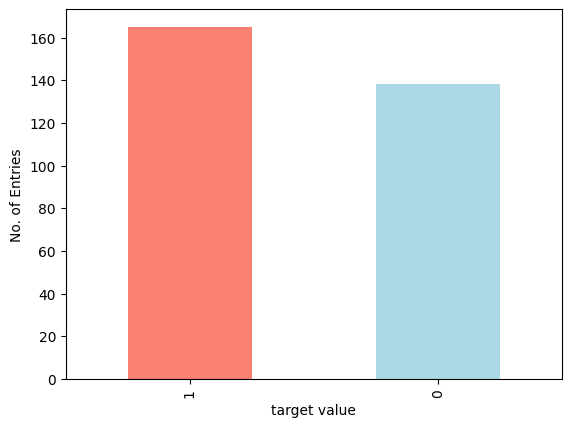

In [ ]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"],xlabel="target value",ylabel="No. of Entries");

In [ ]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Comparing columns**

*heart disease frequency to sex

In [ ]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


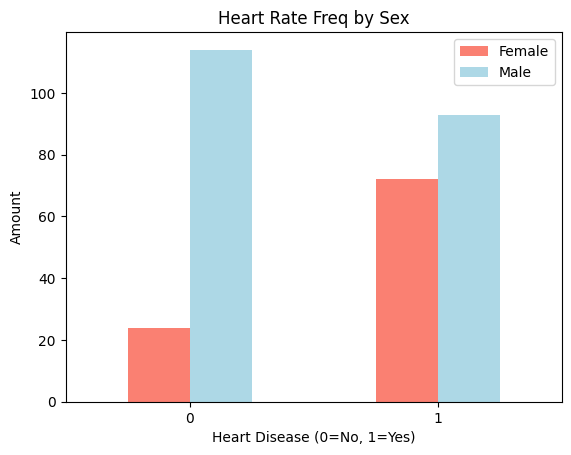

In [ ]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",color=["salmon","lightblue"])
plt.title("Heart Rate Freq by Sex")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

*age,thalach and target

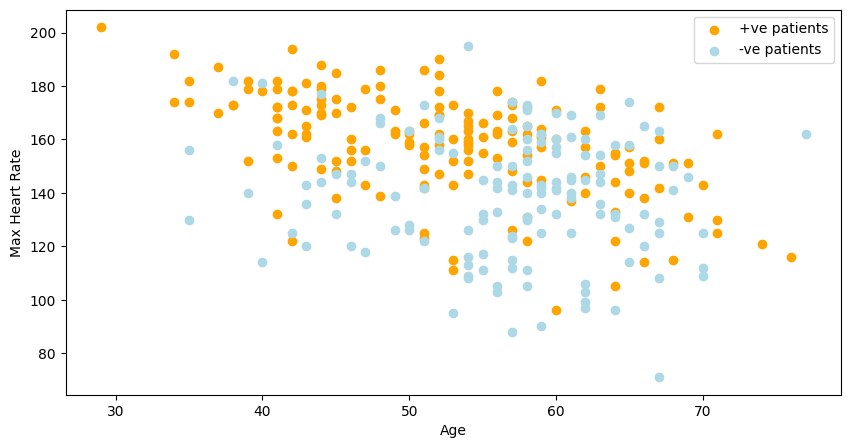

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="orange")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["+ve patients","-ve patients"])
plt.show()

<Axes: ylabel='Frequency'>

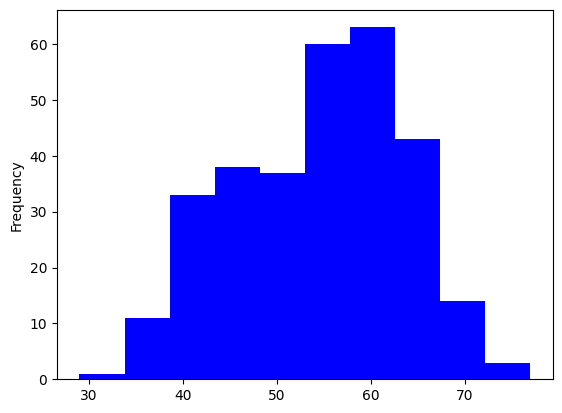

In [ ]:
df.age.plot.hist(color="blue")

*chest pain and target

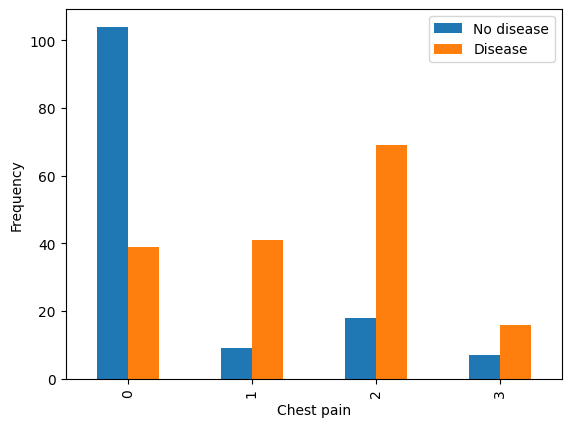

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar")
plt.xlabel("Chest pain")
plt.ylabel("Frequency")
plt.legend(["No disease","Disease"])
plt.show()

Make a Correlation Matrix

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


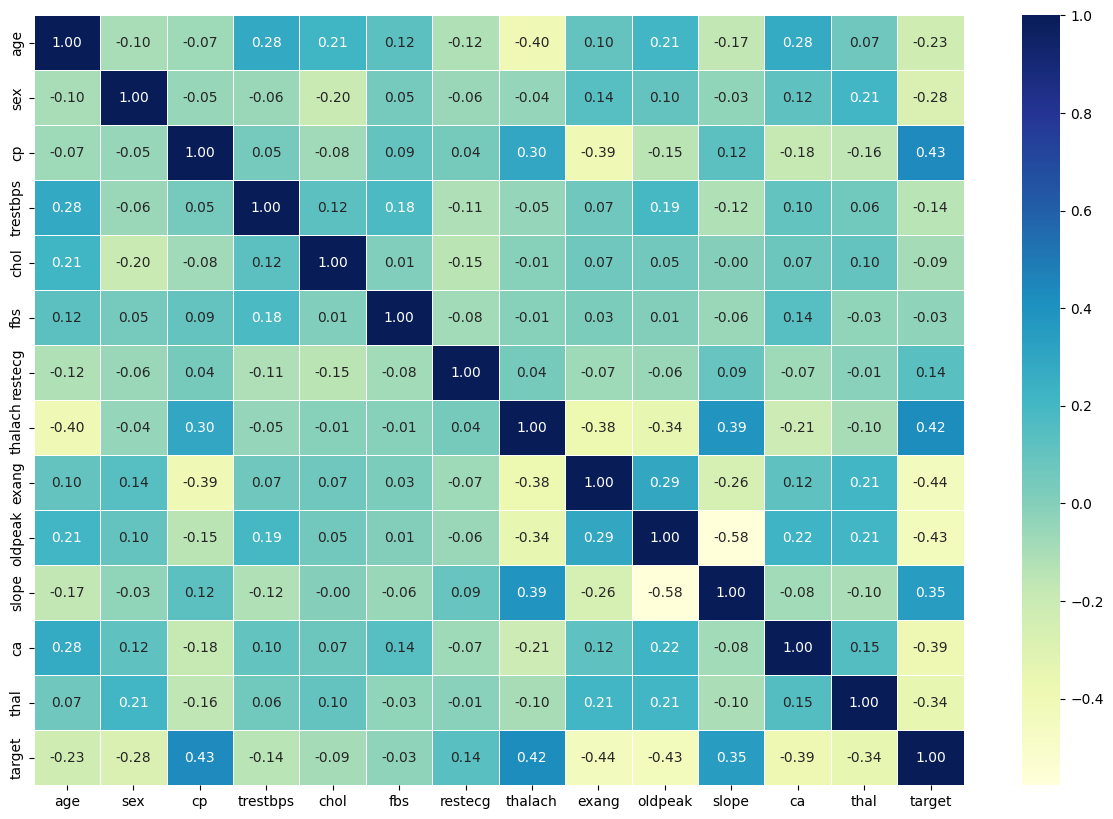

In [ ]:
cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

**Modelling**

In [ ]:
#split data

x=df.iloc[:,:-1].values
y=df.iloc[:, -1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape,x.shape

((242, 13), (61, 13), (303, 13))

In [ ]:
y_train.shape,y_test.shape,y.shape

((242,), (61,), (303,))

**selecting right model**

we are goig to try 3 models -

1. logistic regression
2. k-nearest neighbours classifier
3. random forest classifier

In [ ]:
# Put the models in a dictionary
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
models = {
    "Logistic Regression": log_reg,
    "KNN": knn,
    "Random Forest": rf
}

# Create a function to fit and score models
def fit_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given ML models.

    models: Dictionary of different scikit-learn models.
    x_train: Training data (no labels).
    x_test: Testing data (no labels).
    y_train: Training labels.
    y_test: Testing labels.
    """

    model_scores = {}
    for name, model in models.items():
        model_instance = model
        model_instance.fit(x_train, y_train)
        model_scores[name] = model_instance.score(x_test, y_test)
    return model_scores

model_scores = fit_score(models, x_train, x_test, y_train, y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8688524590163934}

**Model Comparison**

<Axes: >

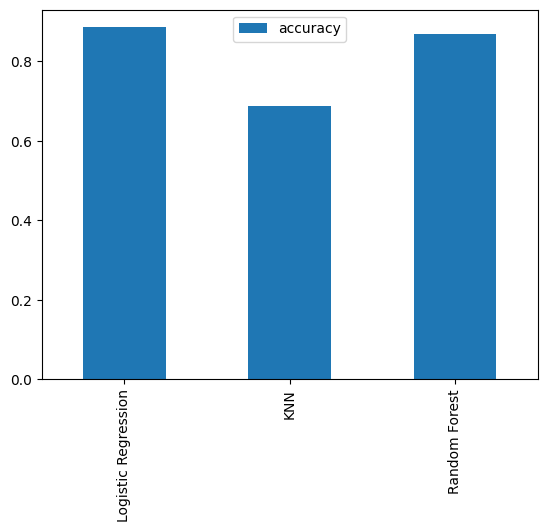

In [ ]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot(kind="bar")


lets look at following :

* hyperparameter tuning

* feature importance

* confusion matrix

* cross validation

* precision recall

* f1 score

* classification report

* ROC curve

* area under curve (AUC)

**Hyperparameter tunning**

let's tune KNN

In [ ]:
train_scores=[]
test_scores=[]

#create a list of different values for n_neighbours
neighbours=range(1,21)

#setup KNN instances
knn=KNeighborsClassifier()

for i in neighbours:
  knn.set_params(n_neighbors=i)
  knn.fit(x_train,y_train)
  train_scores.append(knn.score(x_train,y_train))
  test_scores.append(knn.score(x_test,y_test))

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

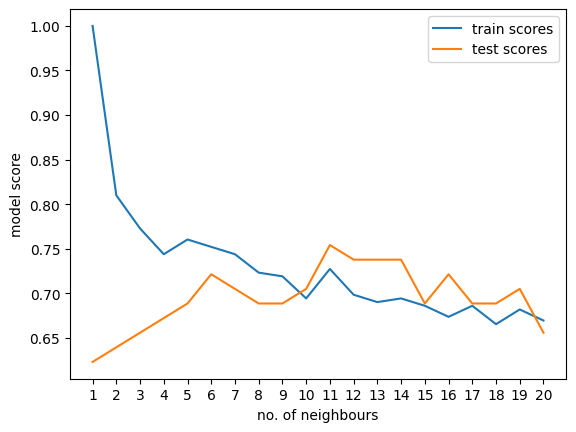

In [ ]:
plt.plot(neighbours,train_scores,label="train scores")
plt.plot(neighbours,test_scores,label="test scores")
plt.xlabel("no. of neighbours")
plt.xticks(np.arange(1,21,1))
plt.ylabel("model score")
plt.legend()

**hyperparameter tuning with RandomizedSearchCV**

let's tune LogisticRegression() , RandomForestClassifier()

In [ ]:
# hyperparameter grid for LogisticRegression()
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]
             }


# hyperparameter grid for RandomForestClassifier()
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
        }

**tune LogisticRegression()**

In [ ]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,n_iter=20,verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

**tune RandomForestClassifier()**

In [ ]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,n_iter=20,verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [ ]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8688524590163934}

# **hyperparameter tuning using GridSearchCV**
since our LogisticRegression model provides best scores so far , we will try to improve it

In [ ]:
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]
             }
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [ ]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8688524590163934}

# evaluating our ml classifier beyond accuracy

In [ ]:
# make predictions with our tuned  model
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
pd.array(y_test)

<IntegerArray>
[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
 1, 1, 0, 0, 0, 1, 0, 0, 0]
Length: 61, dtype: Int64

# ROC Curve and AUC

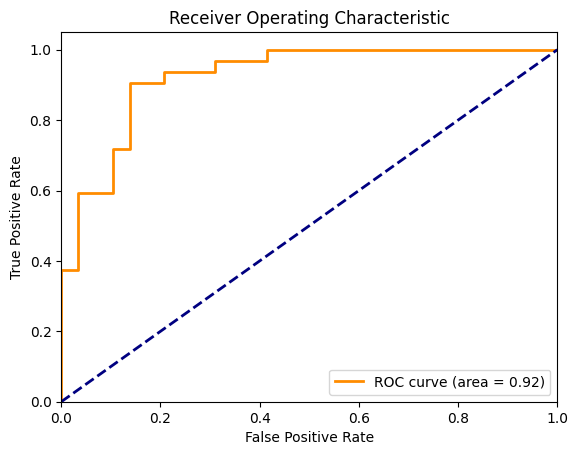

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob = gs_log_reg.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix

In [ ]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


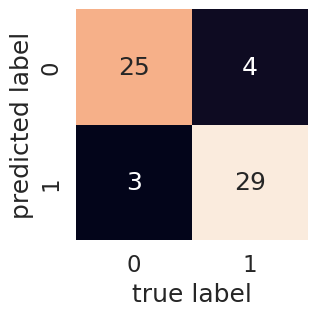

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_pred):
    """
    plots a nice looking confusion matrix using seaborn heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test,y_preds)

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**evaluation metrics using cross validation**

In [ ]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# create new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [ ]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [ ]:
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [ ]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [ ]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [ ]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [ ]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [ ]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

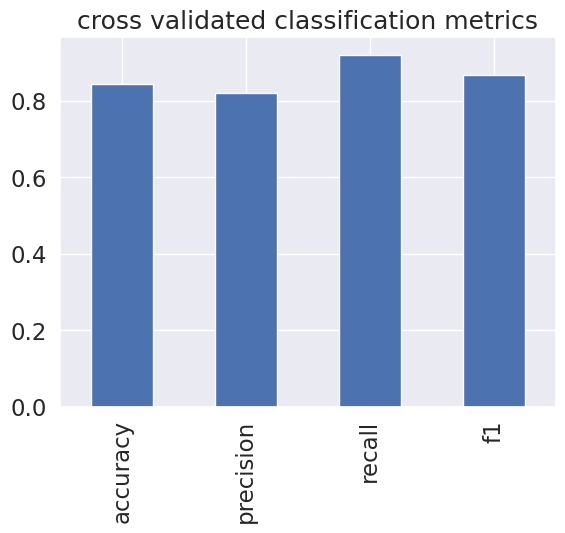

In [ ]:
cv_metrics=pd.DataFrame({"accuracy":cv_acc,
                        "precision":cv_precision,
                        "recall":cv_recall,
                        "f1":cv_f1
                       },index=[0])
cv_metrics.T.plot.bar(title="cross validated classification metrics",legend=False);

# feature importance
which features contributed most to the outcomes of model and how did they contribute

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(x_train,y_train);
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

<Axes: title={'center': 'feature importance'}>

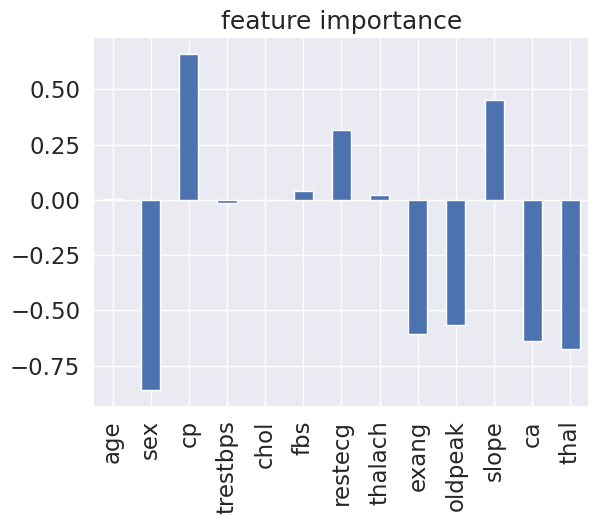

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance",legend=False)

In [ ]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
